### **Tarea MeanShift**

En este cuaderno de Jupyter se desarrollará un ejercicio con el método *MeanShift* para segmentación de imágenes para el repositorio de tareas del curso Física Computacional 2:

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **Ejercicio**

**Imagen** 

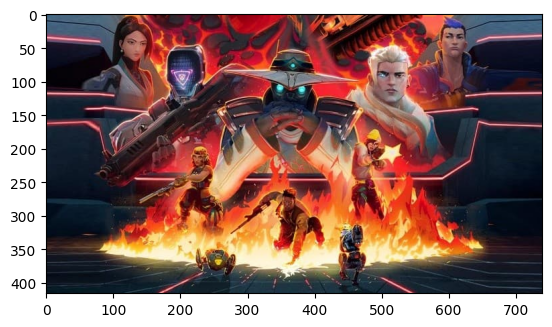

In [4]:
import requests 

name = "my_file.jpg"

url = 'https://gamer.bolavip.com/_next/image?url=https%3A%2F%2Fbolavip.com%2F__export%2F1641830762730%2Fsites%2Fbolavip%2Fimg%2F2022%2F01%2F10%2Fvalorant-calentamiento_crop1641830762248.jpg_1546398727.jpg&w=1920&q=75'

with open(name, 'wb') as file:
    file.write(requests.get(url, stream=True).content)
    
img = cv.imread(name)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

Preprocesamiento de la imagen alisándola.

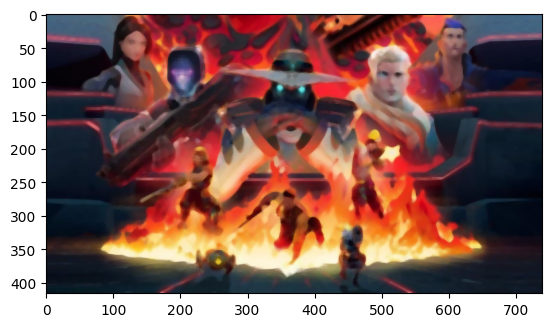

In [5]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Se puede trazar los valores rojo, verde y azul (RGB) como puntos 3D.

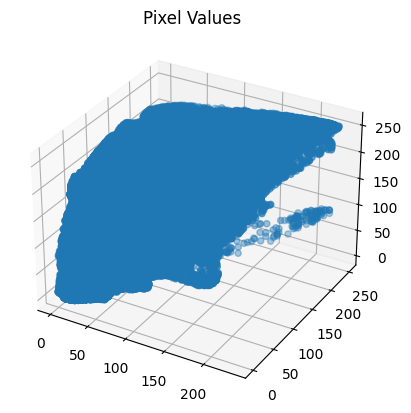

In [6]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

In [7]:
img.shape

(416, 740, 3)

Se tiene una imagen rectángular con 3 canales.

Convertimos la imagen a 416 x 790 filas (416 x 790 = 328640, que es la forma de la matriz) para cada píxel y tres columnas para cada canal de color (rojo, verde, azul), como una matriz numérica de <code>X</code>

In [10]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (307840, 3)
data type   :  uint8


In [11]:
X = np.float32(X)

### Aplicando Mean-Shift a la imagen

Se estima el ancho de banda para usar en el algoritmo Mean-Shift, usando la función <code>estimate_bandwidth</code>:

*   <code>X</code>: array-like of shape <code>(n_samples, n_features)</code>

Input points.

*   <code>quantile</code>: float, default=0.3 debería estar entre \[0, 1], 0.5 significa que se utiliza la mediana de todas las distancias por pares.
*   <code>n_samples</code>: int, El número de muestras a ser usadas. Si no se da, todas las muestras son usadas.

In [12]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth 

33.90997508305668

Se puede crear un objeto <code>MeanShift</code> en sklearn con los siguientes parámetros:

*   <code>bandwidth</code>:float, default=None

Ancho de banda usado en el kernel RBF.

*   <code>max_itert</code>: (default=300) Número máximo de iteraciones por punto inicial antes de que finalice la operación de agrupación (para ese punto inicial), si aún no ha convergido.
*   <code>bin_seeding</code> : Si *true*, Las ubicaciones iniciales del kernel no son ubicaciones de todos los puntos, sino la ubicación de la versión discretizada de los puntos.

In [13]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=33.90997508305668, bin_seeding=True)

Ahora, se tiene el label correspondiente al label de cada fila.

In [14]:
labeled=ms.labels_
labeled

array([2, 2, 2, ..., 0, 0, 0])

Para encontrar el cluster asignado a cada muestra y enlistar los clusters únicos:

In [15]:
clusters=ms.predict(X)
clusters

array([2, 2, 2, ..., 0, 0, 0])

In [16]:
np.unique(labeled)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

También se puede enumerar las ubicaciones reales del centroide del clúster, que también son los valores RGB:

In [17]:
ms.cluster_centers_

array([[ 37.137886,  24.519773,  19.78993 ],
       [ 40.136024,  59.541214, 225.22266 ],
       [120.9245  ,  97.20665 ,  76.06241 ],
       [ 75.60552 , 166.80956 , 244.82034 ],
       [135.01596 , 207.36545 , 245.88618 ],
       [196.37245 , 239.35977 , 251.82271 ],
       [143.4547  , 168.14905 , 204.56612 ],
       [212.91566 , 213.90361 ,  97.10844 ],
       [172.41936 , 170.83871 ,  78.48387 ]], dtype=float32)

Convertirtiendo el tipo de datos `unit8` de los clústeres para imágenes:

In [18]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 37,  24,  19],
       [ 40,  59, 225],
       [120,  97,  76],
       [ 75, 166, 244],
       [135, 207, 245],
       [196, 239, 251],
       [143, 168, 204],
       [212, 213,  97],
       [172, 170,  78]], dtype=uint8)

In [19]:
ms.predict(X)

array([2, 2, 2, ..., 0, 0, 0])

**Visualización**

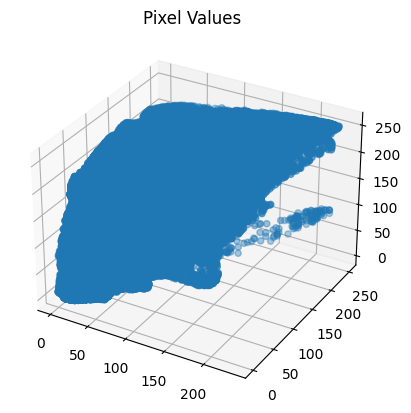

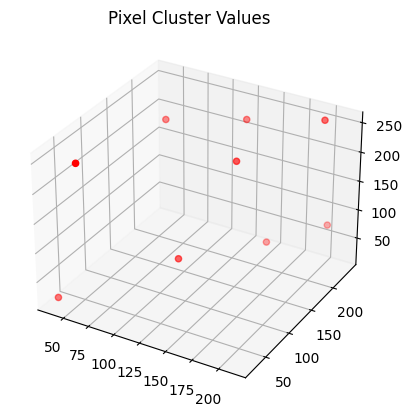

In [20]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

Asignando cada punto de datos al valor del grupo y volviendo a darle forma de una imagen rectangular:

In [21]:
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    

result=result.reshape(img.shape)

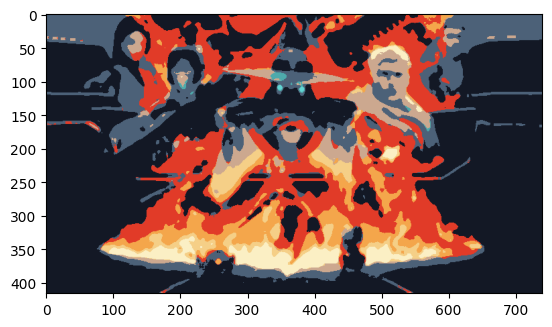

In [22]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

Trazando cada grupo, como un valor de grupo, y viendo que cada grupo corresponde a un objeto diferente, entonces:

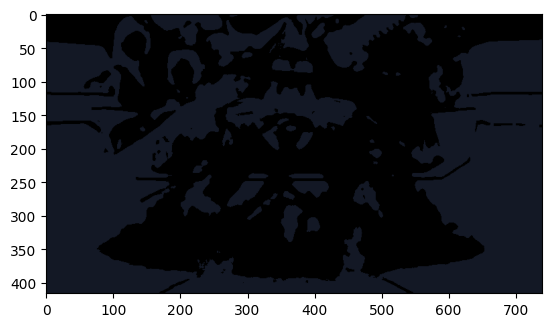

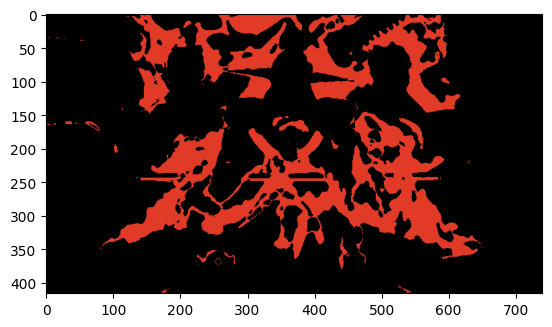

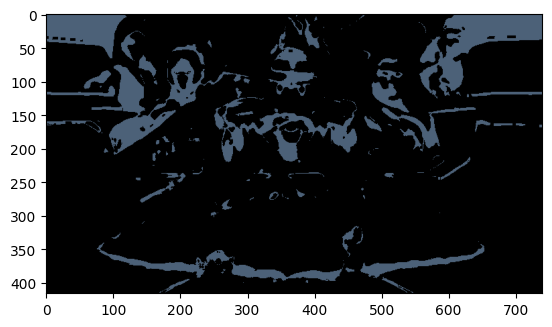

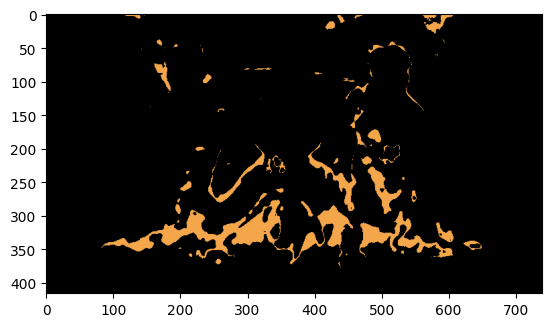

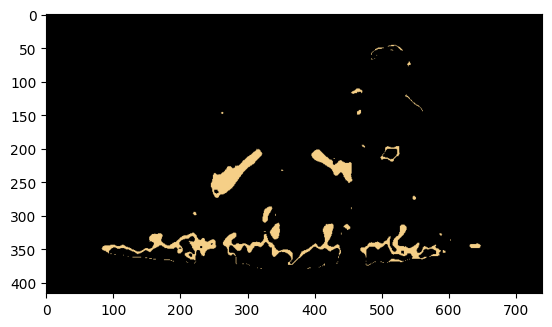

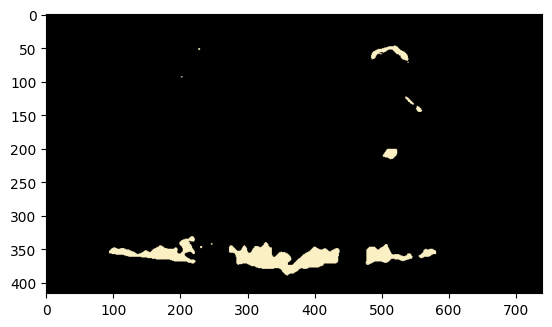

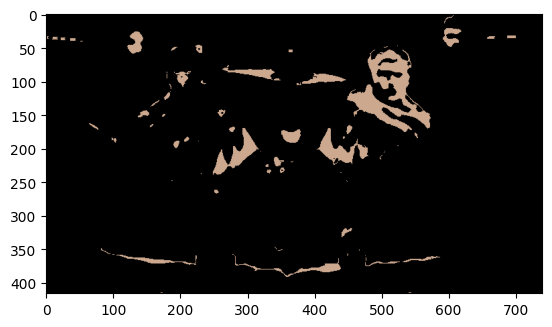

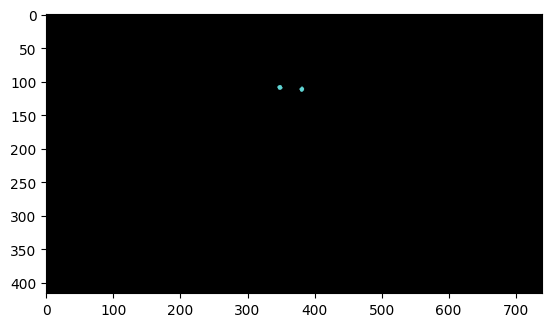

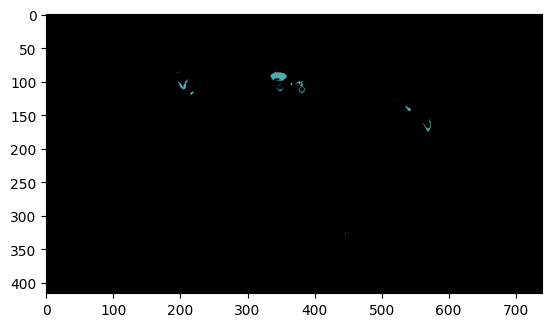

In [23]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()